In [6]:
%matplotlib inline
from IPython.core.display import display
import matplotlib.pyplot as plt
import pickle
import pandas
import numpy
import cv2
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import skimage.feature
DATA_DIR = "../../data/data/"
TEST_DATA_DIR = DATA_DIR + "Train/"

In [27]:
im = Image.open("../../data/data/Train/3.jpg", "r")
im = numpy.array(im)
#plt.imshow(im)

In [28]:
im.shape

(3328, 4992, 3)

In [4]:
im.shape

(3744, 5616, 3)

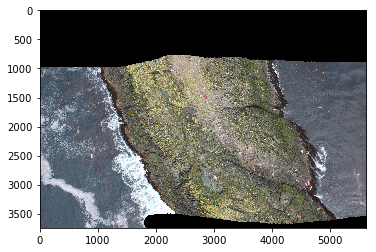

In [5]:
im = Image.open("../../data/data/TrainDotted/1.jpg", "r")
img = numpy.array(im)
plt.imshow(img)

In [3]:
from find_lions import find_data

In [4]:
aaa = find_data(1)
for k, v in aaa.items():
    print(k, len(v))

subadult_males 20
error 0
adult_males 2
pups 0
juveniles 12
adult_females 0


In [11]:
aaa["adult_males"][1].coord

(2233, 871)

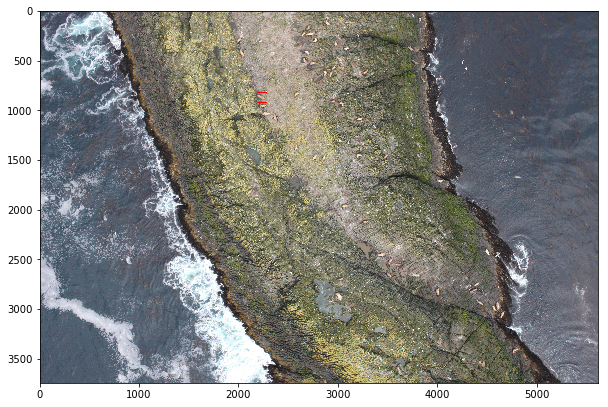

In [12]:
plt.figure(figsize=(10,10))
im = cv2.imread("../../data/data/Train/1.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
cv2.rectangle(im, (2233 - 50 , 871 - 50), (2233 + 50, 871 + 50), (255, 0, 0), 3)
im = numpy.array(im)
plt.imshow(im)

In [20]:
plt.figure(figsize=(10,10))
im = numpy.array(Image.open("../../data/data/Train/1.jpg", "r"))
print(im.T.shape, im.shape)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im = im[871 - 50:871+50, 2233 - 50:2233 + 50]
#plt.imshow(im)

(3, 5616, 3744) (3744, 5616, 3)


In [ ]:
im

In [10]:
from load_data import _load_data
from find_lions import SealionData, DATA_DIR      
data, label = _load_data(1)

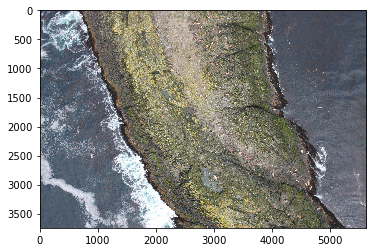

In [7]:
display(plt.imshow(data))

TypeError: Invalid dimensions for image data

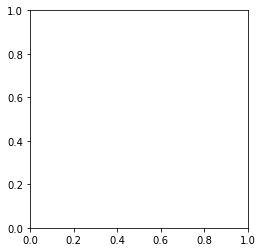

In [11]:
display(plt.imshow(label))

In [11]:
with open('sealion_loc.pkl', 'rb') as f:                                                                                                                                         
    list_lion = pickle.load(f) 

In [16]:
min_y = 9999
max_y = -1
min_x = 9999
max_x = -1
for lion_data in list_lion:
    if lion_data is None:
        continue
    for s_type, datas in lion_data.items():                                                                                                                                          
        if s_type == 'error':                                                                                                                                                        
            continue                                                                                                                                                                 
        for data in datas:
            y, x = data.coord
            min_y = min(y, min_y)
            max_y = max(y, max_y)
            min_x = min(x, min_x)
            max_x = max(x, max_x)

print(min_y, max_y)
print(min_x, max_x)

0 5615
0 3743


In [18]:
from collections import defaultdict
aaa = defaultdict(int)
for idx in pandas.read_csv('../../data/data/Train/train.csv')['train_id'].values:
    im = numpy.array(Image.open("../../data/data/Train/%s.jpg"%idx, "r"))
    aaa[im.shape] += 1
print(aaa)

defaultdict(<class 'int'>, {(3328, 4992, 3): 458, (3744, 5616, 3): 488, (5616, 3744, 3): 2})


In [9]:
from collections import defaultdict
import glob
import os
aaa = defaultdict(int)
TEST_DATA_DIR = DATA_DIR + "Test/"

for path in tqdm(glob.glob(TEST_DATA_DIR + '*.jpg')):                                                                                                                                                                                                                            
    idx = int(os.path.basename(path).split('.')[0])  
    im = numpy.array(Image.open("../../data/data/Test/%s.jpg"%idx, "r"))
    aaa[im.shape] += 1
print(aaa)


defaultdict(<class 'int'>, {(881, 1280, 3): 1, (3744, 5616, 3): 6983, (3456, 5184, 3): 390, (3456, 4608, 3): 539, (5760, 3840, 3): 5, (3840, 5760, 3): 10718})


In [51]:
pandas.read_csv('../../data/data/Train/train.csv')


,train_id,adult_males,subadult_males,adult_females,juveniles,pups
0,0,62,12,486,42,344
1,1,2,20,0,12,0
2,2,2,0,38,20,0
3,3,8,5,41,7,38
4,4,6,9,2,0,0
5,5,6,4,14,4,19
6,6,2,5,20,18,0
7,7,6,2,33,16,3
8,8,9,5,76,4,51
9,9,4,1,64,36,11


In [37]:
idx = 1
image_1 = cv2.imread("../input/TrainDotted/{}.jpg".format(idx))
image_2 = cv2.imread("../input/Train/{}.jpg".format(idx))

# absolute difference between Train and Train Dotted
image_3 = cv2.absdiff(image_1,image_2)

# mask out blackened regions from Train Dotted
mask_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

error: /opt/conda/conda-bld/opencv_1491943704081/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [39]:
print(image_1)

None


In [32]:
cls_colors = (
            (243,8,5),          # red
            (244,8,242),        # magenta
            (87,46,10),         # brown 
            (25,56,176),        # blue
            (38,174,21),        # green
            )
src_img = numpy.array(Image.open("../../data/data/Train/1.jpg", "r"))
dot_img = numpy.array(Image.open("../../data/data/TrainDotted/1.jpg", "r"))
img_diff = np.abs(src_img - dot_img)
for cls, color in enumerate(cls_colors):
    # color search backported from @bitsofbits.
    color_array = np.array(color)[None, None, :]
    has_color = np.sqrt(np.sum(np.square(dot_img * (img_diff > 0)[:,:,None] - color_array), axis=-1)) < MAX_COLOR_DIFF 
    contours = skimage.measure.find_contours(has_color.astype(float), 0.5)

ValueError: operands could not be broadcast together with shapes (3744,5616,3) (3744,5616,1,3) 

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Filter ranges for each dot color.
redRange = [np.array([160, 0, 0]), np.array([255, 50, 50])]
magnetaRange = [np.array([160, 0, 160]), np.array([255, 50, 255])]
brownRange = [np.array([76, 39, 5]), np.array([94, 53, 22])] #r < 150 and g < 50 and b < 100
blueRange = [np.array([0, 0, 160]), np.array([56, 56, 255])]
greenRange = [np.array([0, 160, 0]), np.array([56, 255, 56])]
colorRanges = [redRange, magnetaRange, brownRange, blueRange, greenRange ]

red = (255, 0, 0)
magneta = (255, 0, 255)
brown = (78, 42, 8)
blue = (0, 0, 255)
green = (0, 255, 0)
colors = [red, magneta, brown, blue, green]

img = cv2.cvtColor(cv2.imread("../../data/data/TrainDotted/1.jpg"), cv2.COLOR_BGR2RGB)
imgPaint = img.copy()

In [26]:
counts = np.zeros(5)
for color in range(0,5):
    cmsk = cv2.inRange(img, colorRanges[color][0], colorRanges[color][1])
    circles = cv2.HoughCircles(cmsk,cv2.HOUGH_GRADIENT,1,50, param1=40,param2=1,minRadius=2,maxRadius=6)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        counts[color] = len(circles[0,:])
        for i in circles[0,:]:
            cv2.rectangle(imgPaint, (i[0] - 50, i[1] - 50), (i[0] + 50, i[1] + 50), colors[color], 3)

[  63.   12.  489.   39.  332.]


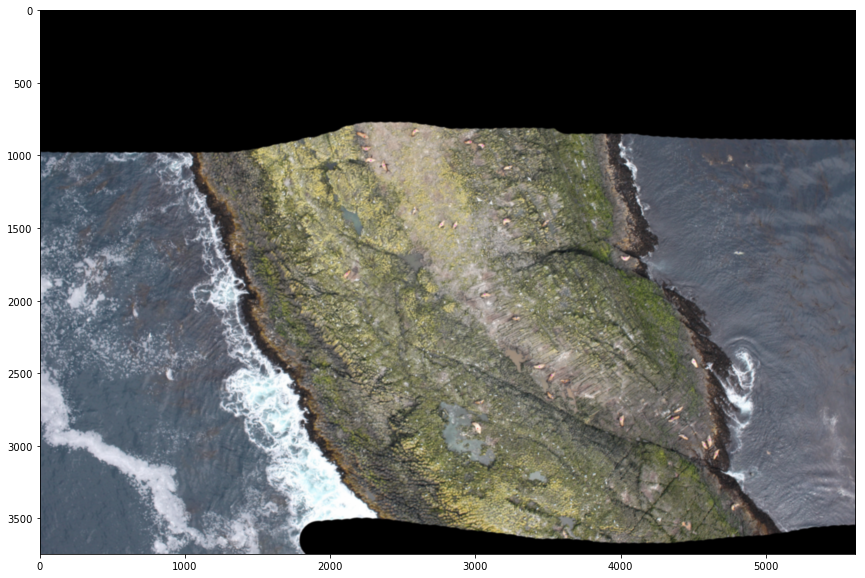

In [29]:
print(counts)

plt.figure(figsize=(20,10))
plt.imshow(imgPaint, cmap = 'gray', interpolation = 'bicubic')

In [30]:
"""
red: adult males
magenta: subadult males
brown: adult females
blue: juveniles
green: pups
"""
[  2.  20.  10.  12.   0.]
pandas.read_csv('../../data/data/Train/train.csv')

SyntaxError: invalid syntax (<ipython-input-30-48d2c9f382c5>, line 8)

In [1]:
from pred_unet import test
ans = test()

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/tensorflow/python/__init__.py", line 61, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow', fp, pathname, description)
  File "/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: libcudart.so.8.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.